In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import pearsonr
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
# import statsmodels.api as sm
# from statsmodels.formula.api import sm
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [18]:
df_clean = pd.read_pickle('data/df_clean_pickled.pkl')
df_clean.head()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53104 entries, 0 to 58975
Data columns (total 49 columns):
LOS                           53104 non-null float64
blood                         53104 non-null uint8
circulatory                   53104 non-null uint8
congenital                    53104 non-null uint8
digestive                     53104 non-null uint8
endocrine                     53104 non-null uint8
genitourinary                 53104 non-null uint8
infectious                    53104 non-null uint8
injury                        53104 non-null uint8
mental                        53104 non-null uint8
misc                          53104 non-null uint8
muscular                      53104 non-null uint8
neoplasms                     53104 non-null uint8
nervous                       53104 non-null uint8
pregnancy                     53104 non-null uint8
prenatal                      53104 non-null uint8
respiratory                   53104 non-null uint8
skin                  

In [19]:
df_clean.isnull().values.sum()

0

In [4]:
# df_clean.drop(columns=['ETH_BLACK/AFRICAN AMERICAN', 'pregnancy','AGE_senior','AGE_young_adult','ADM_NEWBORN','MAR_UNKNOWN (DEFAULT)', \
# 'INS_Private','ETH_OTHER/UNKNOWN','REL_RELIGIOUS','REL_UNOBTAINABLE','AGE_middle_adult','ETH_HISPANIC/LATINO',  \
# 'ETH_WHITE','MAR_SINGLE','REL_NOT SPECIFIED','MAR_DIVORCED','ADM_ELECTIVE','MAR_MARRIED','MAR_SEPARATED',   \
# 'ETH_ASIAN','AGE_newborn','MAR_WIDOWED','INS_Self Pay','MAR_LIFE PARTNER']
# , inplace=True)


In [20]:
df_clean.loc[df_clean.LOS > 50, 'LOS'] = 50.1111111




# df_clean.at[18635,'LOS'] = 203.0     #  294.66041666666666

In [21]:
df_clean[df_clean['LOS']>50].shape

(928, 49)

In [22]:
# Target Variable (Length-of-Stay)
LOS = df_clean['LOS'].values
# Prediction Features
features = df_clean.drop(columns=['LOS'])

In [23]:
# Split into train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    LOS, 
                                                    test_size = .20, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 42483 samples.
Testing set has 10621 samples.


In [24]:
# Regression models for comparison
models = [SGDRegressor(random_state = 0), 
          GradientBoostingRegressor(random_state = 0), 
          LinearRegression(),
          KNeighborsRegressor(),
          RandomForestRegressor(random_state = 0)]

results = {}

for model in models:
    
    # Instantiate and fit Regressor Model
    reg_model = model
    reg_model.fit(X_train, y_train)
    
    # Make predictions with model
    y_test_preds = reg_model.predict(X_test)
    
    # Grab model name and store results associated with model
    name = str(model).split("(")[0]

    results[name] = r2_score(y_test, y_test_preds)
    print('{} done.'.format(name))

SGDRegressor done.
GradientBoostingRegressor done.
LinearRegression done.
KNeighborsRegressor done.


C:\Users\sreedharv\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor done.


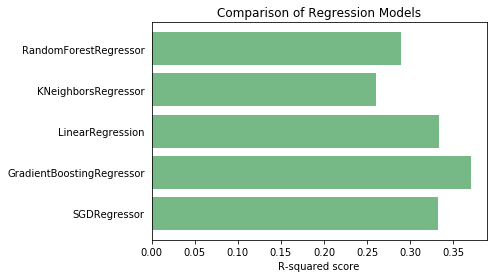

In [25]:
# R2 score results
fig, ax = plt.subplots()
ind = range(len(results))
ax.barh(ind, list(results.values()), align='center', 
        color = '#55a868', alpha=0.8)
ax.set_yticks(ind)
ax.set_yticklabels(results.keys())
ax.set_xlabel('R-squared score')
ax.tick_params(left=False, top=False, right=False) 
ax.set_title('Comparison of Regression Models')
fig.savefig('images/compare_models.png', bbox_inches = 'tight')

In [26]:
# GradientBoostingRegressor will be used as the LOS prediction model
reg_model = GradientBoostingRegressor(random_state=0)   
reg_model.fit(X_train, y_train)
y_test_preds = reg_model.predict(X_test)
r2_not_refined = r2_score(y_test, y_test_preds)
print("R2 score is: {:2f}".format(r2_not_refined)) 

R2 score is: 0.370241


In [27]:
# Split into train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    LOS, 
                                                    test_size = .20, 
                                                    random_state = 42)

# Set the parameters by cross-validation
#tuned_parameters = [{'n_estimators': [100, 200, 300],
#                     'max_depth' : [2, 3, 4],
#                     'loss': ['ls', 'lad', 'huber']}]
tuned_parameters = [{'n_estimators': [200, 300],
                     'max_depth' : [3, 4],
                     'loss': ['ls', 'lad']}]

# create and fit a ridge regression model, testing each alpha
reg_model = GradientBoostingRegressor()  
grid = GridSearchCV(reg_model, tuned_parameters)
grid.fit(X_train, y_train)
reg_model_optimized = grid.best_estimator_

# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_)

C:\Users\sreedharv\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.3871647210406631
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [28]:
#reg_model = GradientBoostingRegressor(n_estimators = 200, max_depth=4, random_state=0)   
#reg_model.fit(X_train, y_train)
y_test_preds = reg_model_optimized.predict(X_test)
r2_optimized = r2_score(y_test, y_test_preds)
print("Optimized R2 score is: {:2f}".format(r2_optimized)) 

Optimized R2 score is: 0.389882


In [15]:

dataset = pd.DataFrame({'y_test': list(y_test), 'y_test_preds': list(y_test_preds)}, columns=['y_test', 'y_test_preds'])
dataset

,y_test,y_test_preds
0,10.485417,14.095595
1,2.581944,10.572787
2,2.279861,2.527703
3,9.083333,11.827296
4,0.636806,4.834609
5,14.863889,8.648998
6,24.304861,17.290589
7,13.959028,45.030510
8,1.951389,8.342923
9,26.295833,9.097004


In [29]:
print('Model refinement improved R2 score by {:.4f}'.format(r2_optimized-r2_not_refined))

Model refinement improved R2 score by 0.0196


In [50]:
# print(y_test, y_test_preds)

type(y_test)


numpy.ndarray

In [16]:
# https://towardsdatascience.com/running-random-forests-inspect-the-feature-importances-with-this-code-2b00dd72b92e
feature_imp = pd.DataFrame(reg_model_optimized.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_imp.head(20)

,importance
prenatal,0.396384
respiratory,0.138762
infectious,0.097234
digestive,0.067569
nervous,0.056310
injury,0.041316
skin,0.026486
congenital,0.022264
genitourinary,0.020351
circulatory,0.014776


In [47]:
feature_imp.index[0:10].tolist()

['prenatal',
 'infectious',
 'respiratory',
 'nervous',
 'digestive',
 'injury',
 'skin',
 'congenital',
 'genitourinary',
 'endocrine']

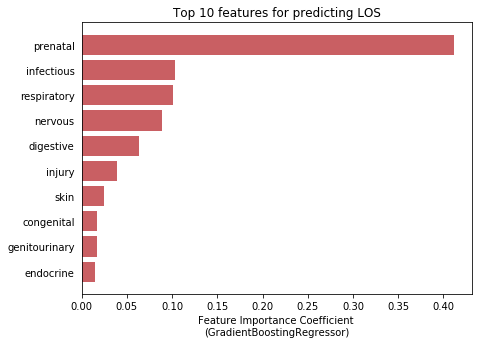

In [48]:
# Plot feature importance
fig, ax = plt.subplots(figsize=(7, 5))
ind = range(0,10)
ax.barh(ind, feature_imp['importance'].values[0:10], 
        align='center', color='#c44e52', alpha=0.9)
ax.set_yticks(ind)
ax.set_yticklabels(feature_imp.index[0:10].tolist())
ax.tick_params(left=False, top=False, right=False) 
ax.set_title("Top 10 features for predicting LOS")
ax.set_xlabel('Feature Importance Coefficient \n(GradientBoostingRegressor)')
plt.gca().invert_yaxis()
fig.savefig('images/feature_importance.png', bbox_inches = 'tight')

NameError: name 'LOS_actual' is not defined

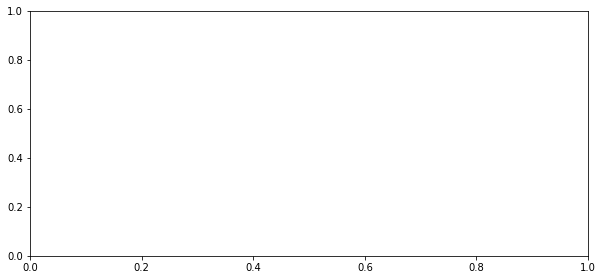

In [17]:
fig, ax = plt.subplots(figsize=(10, 4.5))

# https://matplotlib.org/examples/api/barchart_demo.html
ind = np.arange(0,20)
pad = 0.15
width = 0.35
set_actual = ax.bar(pad+ind, LOS_actual, width, color='#4c72b0', alpha=0.8)
set_predict = ax.bar(pad+ind+width, LOS_predict, width, color='#dd8452')

ax.set_ylabel('Length of Stay (days)')
ax.set_xlabel('Admission Event')
ax.set_title('Prediction Model for Hospital Length of Stay (LOS)')
ax.text(0.5, 11, 'Average LOS', fontdict=None, withdash=False, color='red', alpha=0.8)
ax.text(0.5, 7.5, 'Median LOS', fontdict=None, withdash=False, color='gray')
ax.set_xticks(pad + ind + width)
ax.set_ylim(0, 30)
ax.set_xticklabels(list(range(20)))
ax.axhline(y=actual_median_los, xmin=0, xmax=20, ls='--', color='gray')
ax.axhline(y=actual_mean_los, xmin=0, xmax=20, ls='--', color='red', alpha=0.8)
ax.legend( (set_actual, set_predict), ('Actual LOS', 'Predicted LOS'), 
          loc='upper left')
ax.tick_params(bottom=False, top=False, right=False)

In [ ]:
#y_test_preds = reg_model.predict(X_test)

ml_count, md_count, avg_count  = 0, 0, 0
ml_days, md_days, avg_days  = 0, 0, 0
ml_days_rms, md_days_rms, avg_days_rms  = 0, 0, 0

for i in range(y_test_preds.shape[0]):
    ml_model = abs(y_test_preds[i] - y_test[i])
    median_model = abs(actual_median_los - y_test[i])
    average_model = abs(actual_avg_los - y_test[i])
    
    ml_days += ml_model
    md_days += median_model
    avg_days += average_model
    
    ml_model_rms = (y_test_preds[i] - y_test[i])**2
    median_model_rms = (actual_median_los - y_test[i])**2
    average_model_rms = (actual_avg_los - y_test[i])**2
    
    ml_days_rms += ml_model_rms
    md_days_rms += median_model_rms
    avg_days_rms += average_model_rms

print("Prediction Model days {}".format(ml_days/y_test_preds.shape[0]))
print("Median Model days {}".format(md_days/y_test_preds.shape[0]))
print("Average Model days {}".format(avg_days/y_test_preds.shape[0]))

print("Prediction Model RMS {}".format((ml_days_rms**0.5)/y_test_preds.shape[0]))
print("Median Model RMS {}".format((md_days_rms**0.5)/y_test_preds.shape[0]))
print("Average Model RMS {}".format((avg_days_rms**0.5)/y_test_preds.shape[0]))

In [ ]:
# RMSE plot for writeup
data = pd.DataFrame({'RMSE': [(ml_days_rms**0.5)/y_test_preds.shape[0], 
                             (avg_days_rms**0.5)/y_test_preds.shape[0],
                             (md_days_rms**0.5)/y_test_preds.shape[0]],
                     'LOS Model Type': ['Gradient Boosting', 'Average', 'Median'] })

fig, ax = plt.subplots()
ax = sns.barplot(x='RMSE', y='LOS Model Type', data=data)
ax.set_title('RMSE comparison of Length-of-Stay models')
ax.tick_params(top=False, left=False, right=False)

fig.savefig('images/rms_comparison.png', bbox_inches = 'tight')

In [ ]:
# Calculate Proportion of 'accurate' prediction as a function of allowed margin of error
reg_array = []
median_array = []
average_array = []

for i in list(range(6)):
    reg_count, median_count, average_count = 0, 0, 0
    
    for j in range(y_test_preds.shape[0]):
        # Percent Difference
        reg_model = (y_test_preds[j] - y_test[j])/y_test[j]
        median_model = (actual_median_los - y_test[j])/y_test[j]
        average_model = (actual_avg_los - y_test[j])/y_test[j]
        if abs(reg_model) < i/10:
            reg_count += 1
        if abs(median_model) < i/10:
            median_count += 1
        if abs(average_model) < i/10:
            average_count += 1
            
    reg_array.append((reg_count/y_test_preds.shape[0]))
    median_array.append((median_count/y_test_preds.shape[0]))
    average_array.append((average_count/y_test_preds.shape[0]))

# Plot proportion of 'accurate' prediction as a function of allowed margin of error  
fig, ax = plt.subplots()
ax.plot(reg_array, label='Gradient Boosting')
ax.plot(median_array, label='Median LOS model')
ax.plot(average_array, label='Average LOS model')
ax.set_title('Proportion of Accurate Predictions vs. Percent Error')
ax.set_xlabel('Allowed Margin of Error (Percent Error)')
ax.set_ylabel('Proportion of Accurate Predictions')
ax.set_xticklabels(['0%', '10%', '20%', '30%', '40%', '50%'])
ax.legend(loc='lower right');
ax.tick_params(top=False, right=False)
fig.savefig('images/rms_comparison.png', bbox_inches = 'tight')

In [54]:

pd.set_option('display.max_columns', 50)
df_clean.head()

,LOS,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,GENDER,ICU,NICU,ADM_ELECTIVE,ADM_EMERGENCY,ADM_NEWBORN,ADM_URGENT,INS_Government,INS_Medicaid,INS_Medicare,INS_Private,INS_Self Pay,REL_NOT SPECIFIED,REL_RELIGIOUS,REL_UNOBTAINABLE,ETH_ASIAN,ETH_BLACK/AFRICAN AMERICAN,ETH_HISPANIC/LATINO,ETH_OTHER/UNKNOWN,ETH_WHITE,AGE_middle_adult,AGE_newborn,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_LIFE PARTNER,MAR_MARRIED,MAR_SEPARATED,MAR_SINGLE,MAR_UNKNOWN (DEFAULT),MAR_WIDOWED
0,1.144444,0,1,0,0,0,0,0,4,1,0,0,0,1,0,0,0,0,1,1.0,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1,5.496528,0,4,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
2,6.768056,0,2,0,0,2,0,0,3,0,0,0,1,1,0,1,0,0,0,1.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
3,2.856944,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
4,3.534028,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0


In [57]:
# df_clean_1 = df_clean.at['circulatory'] = 203.0

df_clean_1=df_clean[df_clean['circulatory']>0]


,LOS,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,GENDER,ICU,NICU,ADM_ELECTIVE,ADM_EMERGENCY,ADM_NEWBORN,ADM_URGENT,INS_Government,INS_Medicaid,INS_Medicare,INS_Private,INS_Self Pay,REL_NOT SPECIFIED,REL_RELIGIOUS,REL_UNOBTAINABLE,ETH_ASIAN,ETH_BLACK/AFRICAN AMERICAN,ETH_HISPANIC/LATINO,ETH_OTHER/UNKNOWN,ETH_WHITE,AGE_middle_adult,AGE_newborn,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_LIFE PARTNER,MAR_MARRIED,MAR_SEPARATED,MAR_SINGLE,MAR_UNKNOWN (DEFAULT),MAR_WIDOWED
0,1.144444,0,1,0,0,0,0,0,4,1,0,0,0,1,0,0,0,0,1,1.0,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1,5.496528,0,4,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
2,6.768056,0,2,0,0,2,0,0,3,0,0,0,1,1,0,1,0,0,0,1.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
3,2.856944,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
4,3.534028,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
5,6.988889,0,5,0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
7,5.364583,0,4,0,0,2,0,0,3,1,0,0,0,0,0,0,1,0,0,1.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
8,5.013889,0,6,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
10,19.197917,0,3,0,1,1,0,0,0,0,0,0,0,0,0,1,2,0,0,1.0,0.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
12,1.968056,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0


In [69]:
df_clean_1[df_clean_1['circulatory']>=12]

# age_dict = {0: 'newborn', 1: 'young_adult', 2: 'middle_adult', 3: 'senior'}

,LOS,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,GENDER,ICU,NICU,ADM_ELECTIVE,ADM_EMERGENCY,ADM_NEWBORN,ADM_URGENT,INS_Government,INS_Medicaid,INS_Medicare,INS_Private,INS_Self Pay,REL_NOT SPECIFIED,REL_RELIGIOUS,REL_UNOBTAINABLE,ETH_ASIAN,ETH_BLACK/AFRICAN AMERICAN,ETH_HISPANIC/LATINO,ETH_OTHER/UNKNOWN,ETH_WHITE,AGE_middle_adult,AGE_newborn,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_LIFE PARTNER,MAR_MARRIED,MAR_SEPARATED,MAR_SINGLE,MAR_UNKNOWN (DEFAULT),MAR_WIDOWED
2314,13.336806,2,12,0,1,2,0,0,0,0,1,0,0,0,0,0,1,0,1,1.0,0.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
5016,14.847222,0,13,0,2,4,3,0,10,2,0,0,0,3,0,0,0,0,0,1.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
7942,16.761111,1,12,0,0,1,1,0,1,0,0,0,0,0,0,0,2,0,0,1.0,0.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
8649,9.988194,0,12,0,0,2,0,0,6,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
14529,5.961111,0,13,0,1,1,2,0,2,2,0,0,0,1,0,0,1,2,0,1.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
20687,9.877083,1,12,0,0,3,2,1,6,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
20932,13.197222,1,12,0,0,4,2,1,5,1,3,0,2,0,0,0,2,0,1,1.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
30330,23.805556,2,12,1,2,2,0,1,6,1,1,1,0,2,0,0,1,2,0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
31666,12.316667,1,12,0,0,2,0,0,6,2,0,0,0,0,0,0,2,0,0,1.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
31768,9.990278,0,12,0,2,0,0,0,4,0,0,1,0,0,0,0,0,0,1,1.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0


In [75]:
LOS_actual = list(y_test)

LOS_predict =list(y_test_preds)





ValueError: shape mismatch: objects cannot be broadcast to a single shape

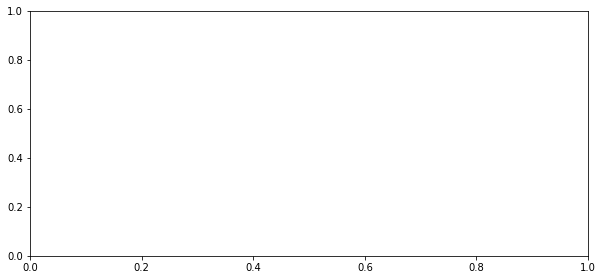

In [76]:
fig, ax = plt.subplots(figsize=(10, 4.5))

# https://matplotlib.org/examples/api/barchart_demo.html
ind = np.arange(0,20)
pad = 0.15
width = 0.35
set_actual = ax.bar(pad+ind, LOS_actual, width, color='#4c72b0', alpha=0.8)
set_predict = ax.bar(pad+ind+width, LOS_predict, width, color='#dd8452')

ax.set_ylabel('Length of Stay (days)')
ax.set_xlabel('Admission Event')
ax.set_title('Prediction Model for Hospital Length of Stay (LOS)')
ax.text(0.5, 11, 'Average LOS', fontdict=None, withdash=False, color='red', alpha=0.8)
ax.text(0.5, 7.5, 'Median LOS', fontdict=None, withdash=False, color='gray')
ax.set_xticks(pad + ind + width)
ax.set_ylim(0, 30)
ax.set_xticklabels(list(range(20)))
ax.axhline(y=actual_median_los, xmin=0, xmax=20, ls='--', color='gray')
ax.axhline(y=actual_mean_los, xmin=0, xmax=20, ls='--', color='red', alpha=0.8)
ax.legend( (set_actual, set_predict), ('Actual LOS', 'Predicted LOS'), 
          loc='upper left')
ax.tick_params(bottom=False, top=False, right=False)

In [72]:
performance = [10,8,6,4,2,1]
type(performance)

list

In [73]:
type(y_test)

numpy.ndarray

In [78]:
# list(y_test)

# list(y_test_preds)


y_test.size
y_test_preds.size

10621

In [17]:
# df_clean[df_clean['LOS']>75].sum()

feature_imp

,importance
prenatal,0.396384
respiratory,0.138762
infectious,0.097234
digestive,0.067569
nervous,0.056310
injury,0.041316
skin,0.026486
congenital,0.022264
genitourinary,0.020351
circulatory,0.014776
